## Support Vector Classifier on Cancer Data

### Import the Libraries

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset

In [230]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\cancer_pred.csv")

### Explore the Data 

In [231]:
df.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### 10 independent features and 1 dependent feature
Based on ['ID' , 'Clump' , 'UnifSize' , 'UnifShape' , 'MargAdh' , 'SingEpiSize' , 'BareNuc' , 'BlandChrom' , 'NormNucl' , 'Mit'] 
<br>
we have to predict the type of cancer i.e., the Class 2 or 4 <br>
2 -> benign<br>
4 -> maligant


In [232]:
df.shape

(699, 11)

In [233]:
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [234]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [235]:
df=df.drop(['ID'],axis=1)

In [236]:
df.head(5)

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [237]:
df.dtypes

Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [238]:
df['BareNuc']=df['BareNuc'].replace("?",1)
df = df[pd.to_numeric(df['BareNuc']).notnull()]
df['BareNuc'] = df['BareNuc'].astype('int64')
        

In [239]:
df.dtypes

Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [240]:
a=df.columns
a=a.drop(['Class'])
a

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit'],
      dtype='object')

In [241]:
import seaborn as sns

In [242]:
def fn(feature):
    sns.countplot(x=feature,hue='Class',data=df)
    plt.show()
    

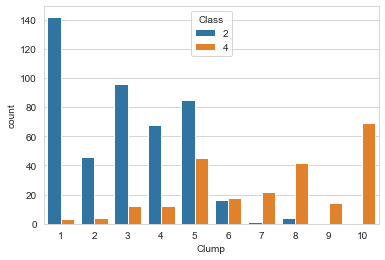

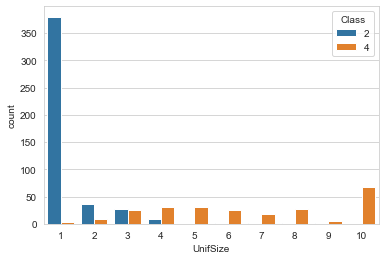

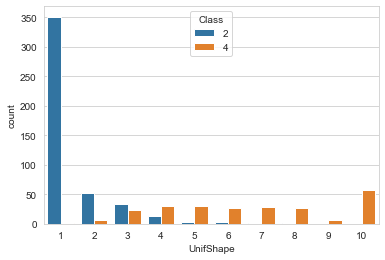

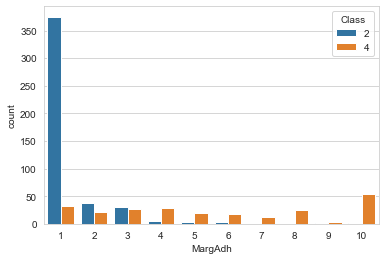

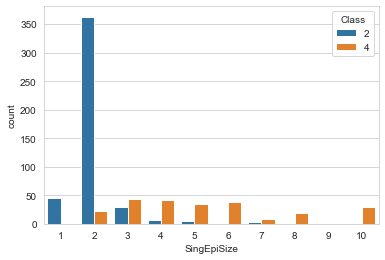

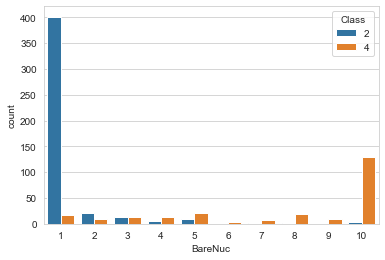

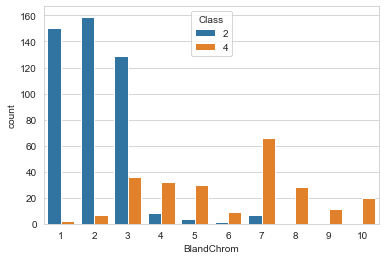

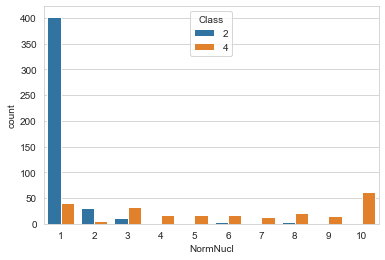

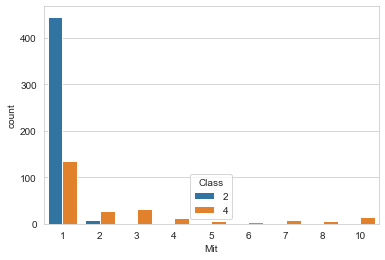

In [243]:
for i in a:
    fn(i)

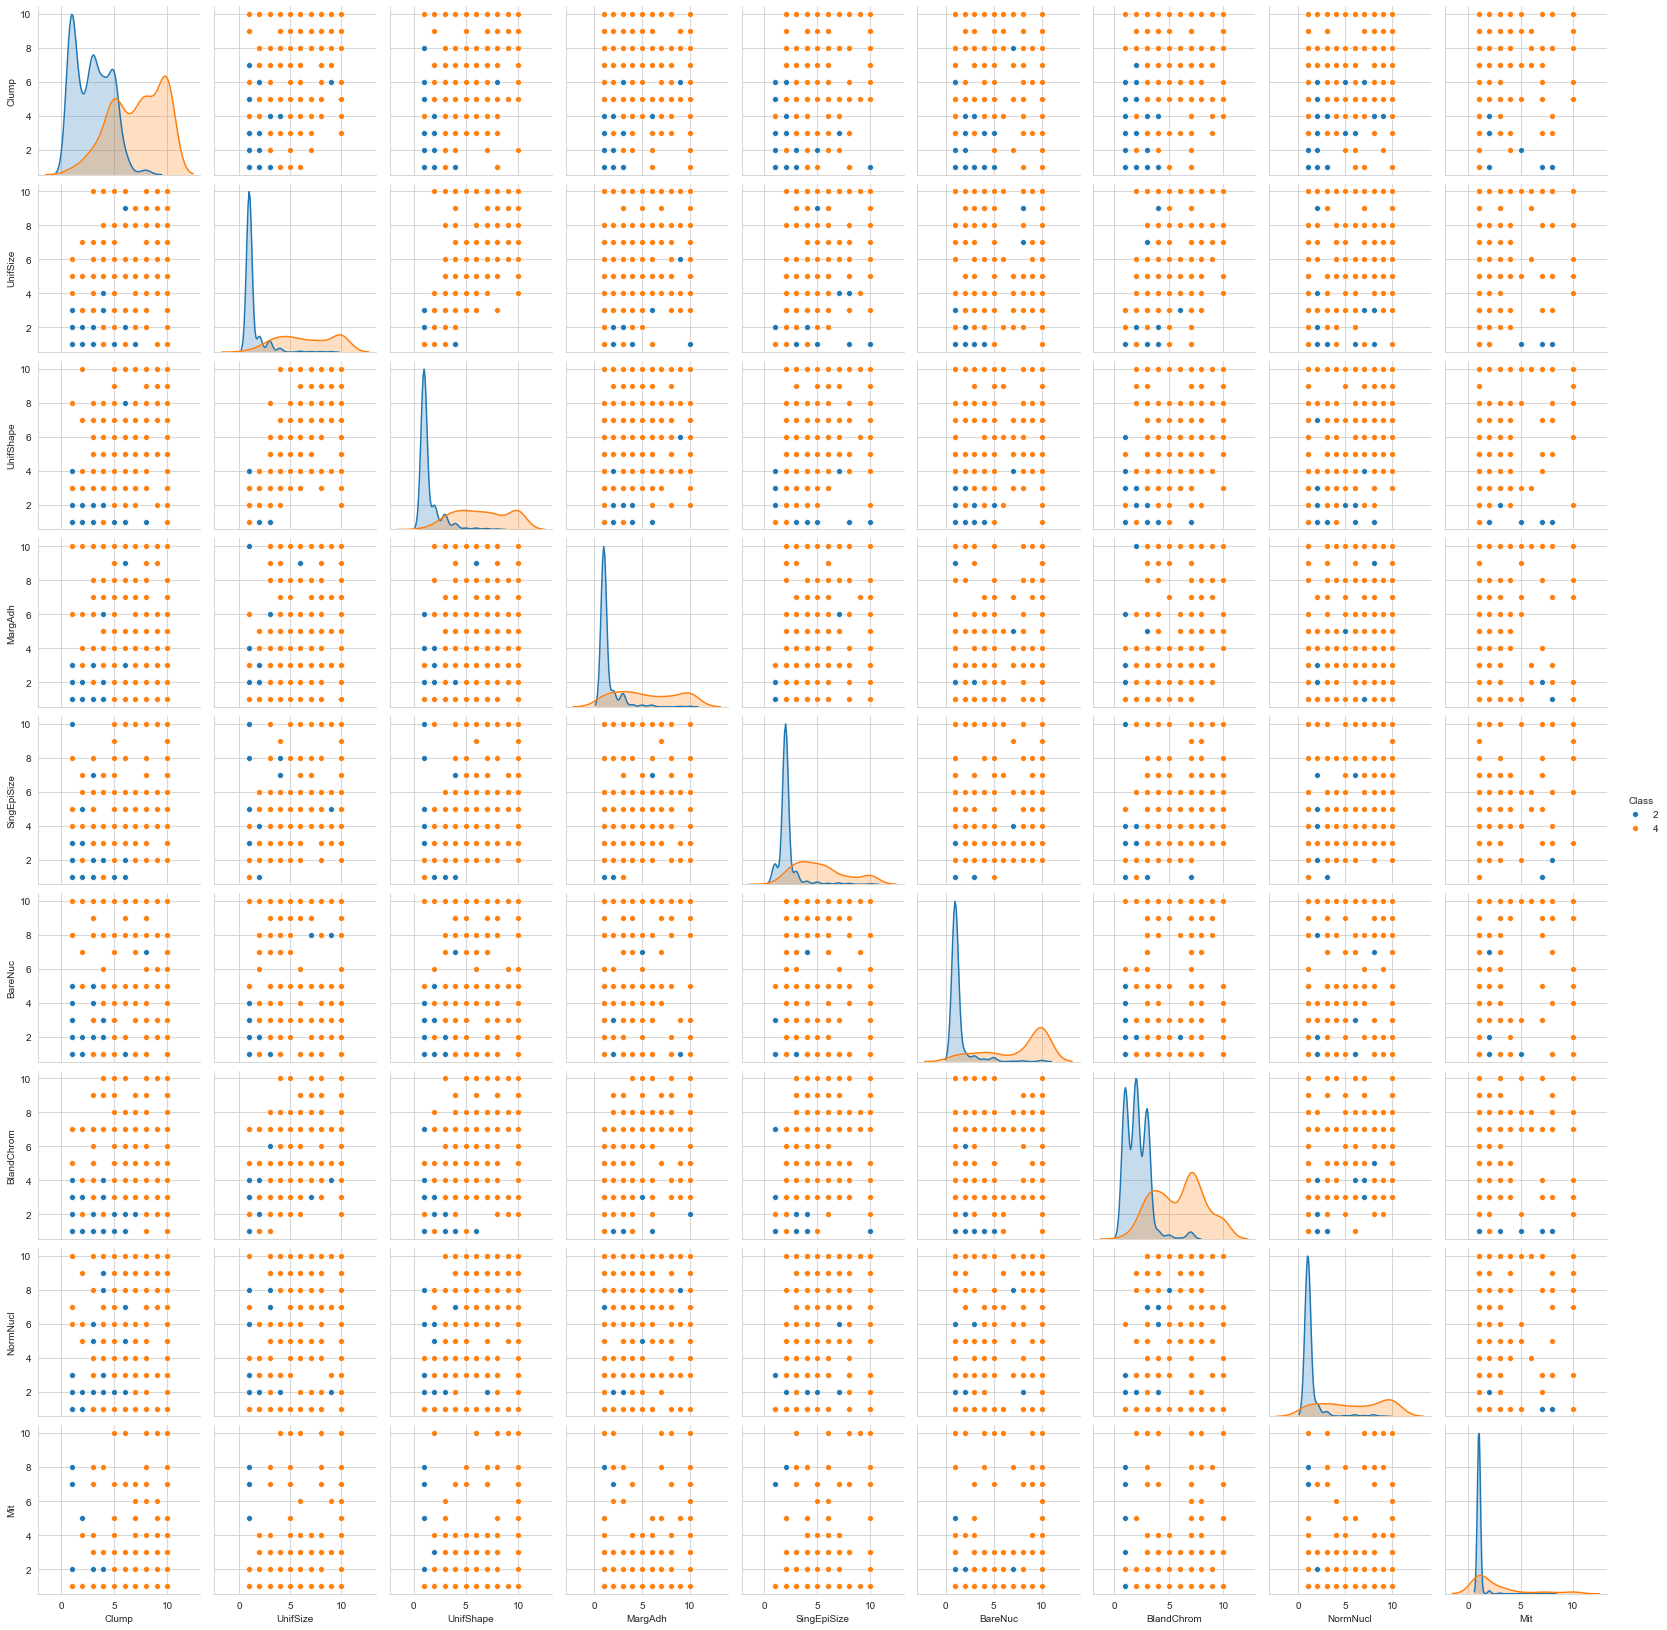

In [244]:
sns.set_style("whitegrid")
sns.pairplot(data=df,hue='Class')

In [245]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

### Train Test Split

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.2)

### Support Vector Classifier to predict the output

#### SVM using Linear Kernel

In [248]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(train_X, train_Y) 

SVC(kernel='linear')

#### Evaluation

In [249]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_Y, clf.predict(test_X))

array([[96,  3],
       [ 5, 36]], dtype=int64)

Total 8 misclassified results are there

In [250]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, clf.predict(test_X)))

              precision    recall  f1-score   support

           2       0.95      0.97      0.96        99
           4       0.92      0.88      0.90        41

    accuracy                           0.94       140
   macro avg       0.94      0.92      0.93       140
weighted avg       0.94      0.94      0.94       140



#### SVM using RBF(Radial Basis Function ) Kernel

In [251]:
from sklearn import svm
clf_rbf = svm.SVC(kernel='rbf',gamma='auto')
clf_rbf.fit(train_X, train_Y) 

SVC(gamma='auto')

#### Evaluation

In [252]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_Y, clf_rbf.predict(test_X))

array([[93,  6],
       [ 2, 39]], dtype=int64)

In [253]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, clf_rbf.predict(test_X)))

              precision    recall  f1-score   support

           2       0.98      0.94      0.96        99
           4       0.87      0.95      0.91        41

    accuracy                           0.94       140
   macro avg       0.92      0.95      0.93       140
weighted avg       0.95      0.94      0.94       140



### SVM Classifier Visualization

Considering only 2 independent features that is, Clump and BlandChrom we will try to predict the Class Values and will try to visualize SVM on it.

In [254]:
x=np.asarray(df[['Clump','BlandChrom']])

In [255]:
y=df.iloc[:,-1]

#### Vis. of Linear SVC

In [256]:
svc = svm.SVC(kernel='linear',).fit(x, y)

In [257]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
h = (x_max / x_min)/100

C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


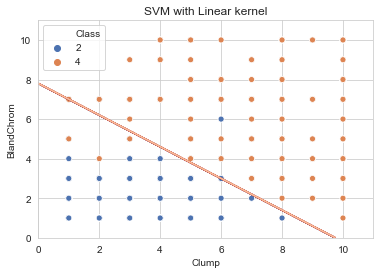

In [258]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svc.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z)
sns.scatterplot(x='Clump',y='BlandChrom',hue='Class',data=df,palette="deep")
plt.title('SVM with Linear kernel')
plt.show()

#### vis. of rbf SVC

In [259]:
svc = svm.SVC(kernel='rbf',).fit(x, y)

In [260]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

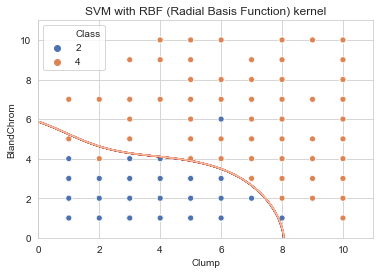

In [261]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svc.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z)
sns.scatterplot(x='Clump',y='BlandChrom',hue='Class',data=df,palette="deep")
plt.title('SVM with RBF (Radial Basis Function) kernel')
plt.show()